In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt



In [11]:
# read_csv() 함수로 df 생성
# df = pd.read_csv('./auto-mpg.csv', header=None)
import pymysql

DB_HOST = 'localhost'
DB_USER = 'root'
DB_PASSWD = 'autoset'
DB_NAME = 'python'

conn = pymysql.connect(host=DB_HOST, user=DB_USER, password=DB_PASSWD,
                   db=DB_NAME, charset='utf8')
curs = conn.cursor()
sql = """
 
    SELECT `posneg_grade`, ROUND(`posneg_rate`,0), count(*)
    FROM `tooncomment_best` 
    group by ROUND(`posneg_rate`,0),`posneg_grade`
    order by `posneg_grade`, ROUND(`posneg_rate`,0)
 """

curs.execute(sql)
table_data = curs.fetchall() 
conn.close()

table_data = [list(table_data[x]) for x in range(len(table_data))]       # tupple을 list형태로 변경

import pandas as pd
df = pd.DataFrame(table_data)    # list를 Dataframe 으로 변경
# print(type(df))

# 열 이름을 지정
df.columns = ['posneg_grade','posneg_rate','posneg_cnt']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   posneg_grade  105 non-null    object 
 1   posneg_rate   105 non-null    float64
 2   posneg_cnt    105 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.6+ KB


In [12]:
df.head()

,posneg_grade,posneg_rate,posneg_cnt
0,Bad,50.0,36
1,Bad,51.0,86
2,Bad,52.0,75
3,Bad,53.0,112
4,Bad,54.0,82


In [14]:
import matplotlib.pyplot as plt
plt.style.use('default')   # 스타일 서식 지정

# 데이터 개수 카운트를 위해 값 1을 가진 열을 추가
df['count'] = 1
df_origin = df.groupby('posneg_grade').sum()   # origin 열을 기준으로 그룹화, 합계 연산
print(df_origin.head())                  # 그룹 연산 결과 출력



              posneg_rate  posneg_cnt  count
posneg_grade                                
Bad                3825.0        5752     51
Empty                 0.0          10      1
Filter                0.0           1      1
Good               3825.0        4260     51
W                     0.0      100598      1


In [15]:
# origin 값을 실제 지역명으로 변경
df_origin.index = ['Bad', 'Empty', 'Filter','Good','Wait']



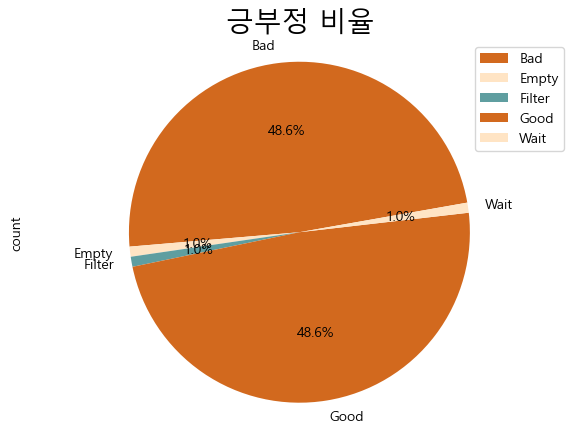

In [19]:
# 제조국가(origin) 열에 대한 파이 차트 그리기 – count 열 데이터 사용
df_origin['count'].plot(kind='pie', 
                     figsize=(7, 5),
                     autopct='%1.1f%%',   # 퍼센트 % 표시
                     startangle=10,       # 파이 조각을 나누는 시작점(각도 표시)
                     colors=['chocolate', 'bisque', 'cadetblue']    # 색상 리스트
                     )

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.title('긍부정 비율', size=20)
plt.axis('equal')    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right')   # 범례 표시
plt.show()

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')


C:\Users\for\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\for\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\for\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\for\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44079 (\N{HANGUL SYLLABLE GAES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\for\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\for\anaconda3\lib\site-pa

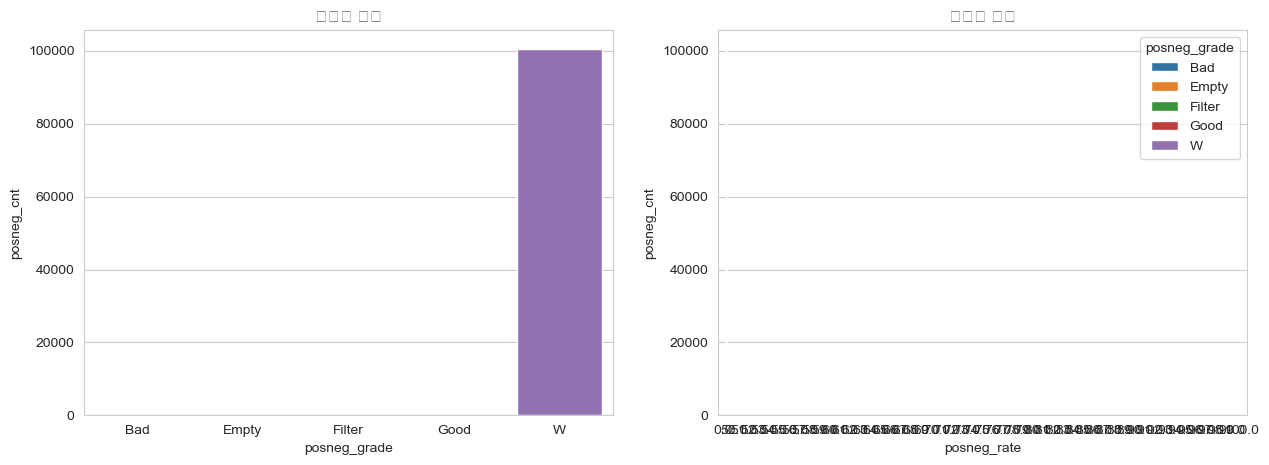

In [30]:
# Seaborn 제공 데이터셋 가져오기
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

 
# x축, y축에 변수 할당
sns.barplot(x='posneg_grade', y='posneg_cnt', data=df, ax=ax1) 

# x축, y축에 변수 할당하고 hue 옵션 추가 
sns.barplot(x='posneg_rate', y='posneg_cnt', hue='posneg_grade', data=df, ax=ax2) 

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='posneg_rate', y='posneg_cnt', hue='posneg_grade', dodge=False, data=df, ax=ax3)       

# 차트 제목 표시
ax1.set_title('구분별 갯수')
ax2.set_title('점수별 갯수')


plt.show()